tensor([1.0000e+00, 2.5600e+02, 2.5600e+02, 1.2800e+02, 3.2000e+01, 1.7200e-01]) tensor([  1.0000, 256.0000, 256.0000, 128.0000,  32.0000,   0.2770])
tensor([1.6000e+01, 3.2000e+01, 2.5600e+02, 6.4000e+01, 3.2000e+01, 1.8800e-01]) tensor([ 16.0000,  32.0000, 256.0000,  64.0000,  32.0000,   0.3090])
tensor([ 16.0000,  32.0000, 256.0000, 128.0000,  32.0000,   0.3180]) tensor([ 16.0000,  32.0000, 256.0000, 128.0000,  32.0000,   0.5130])
tensor([ 16.0000,  64.0000, 256.0000,  64.0000,  32.0000,   0.3490]) tensor([ 16.0000,  64.0000, 256.0000,  64.0000,  32.0000,   0.5740])
tensor([ 16.0000,  64.0000, 256.0000, 128.0000,  32.0000,   0.6010]) tensor([ 16.0000,  64.0000, 256.0000, 128.0000,  32.0000,   0.9750])
tensor([ 16.0000, 128.0000, 256.0000,  64.0000,  32.0000,   0.6610]) tensor([ 16.0000, 128.0000, 256.0000,  64.0000,  32.0000,   1.0970])
tensor([ 16.0000, 128.0000, 256.0000, 128.0000,  32.0000,   1.1610]) tensor([ 16.0000, 128.0000, 256.0000, 128.0000,  32.0000,   1.9000])
tensor([ 1

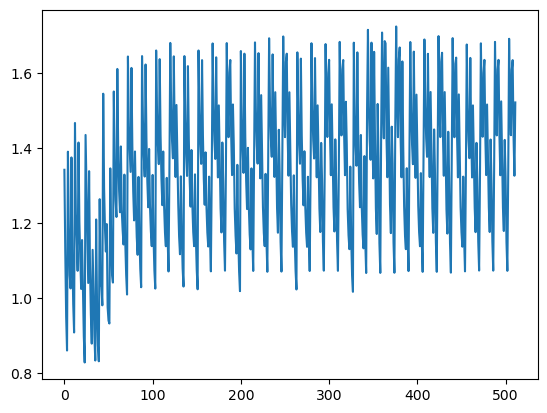

In [ ]:
import torch
import re
import matplotlib.pyplot as plt
def load_data_to_tensor(file_path):
	data_list = []
	with open(file_path, 'r') as file:
		for line in file:
			match = re.search(r'bs=(\d+)\s*, dimX=(\d+)\s*, DY=(\d+)\s*, N=(\d+)\s*, K=(\d+)\s*, TIME=\s*([\d.]+)ms', line)
			if match:
				bs, dimX, DY, N, K, time = map(float, match.groups())
				data_list.append([bs, dimX, DY, N, K, time])
	tensor_data = torch.tensor(data_list, dtype=torch.float32)
	return tensor_data
file_path = ['exp_data/1D_A', 'exp_data/1D_E']
data = []
for file in file_path:
	data.append(load_data_to_tensor(file))
plt.figure()
plt.plot(data[1][:, -1] / data[0][:, -1], label='A')

performance_ratio =  data[1][:, -1] / data[0][:, -1]
for i in range(1, len(performance_ratio)):
	if performance_ratio[i] > 1.6:
		print(data[0][i], data[1][i, -1])
	# print(performance_ratio[i])